# Lab 2: Revision (2)

In today's lab we'll revise some more Python fundamentals as well as learn how to plot simple diagrams.

## Importing from modules

Python allows programmers to bundle up collections of variables, functions, and other objects such as classes into *modules* that can easily be imported into other projects. One reason Python is such an attractive programming language is the enormous library of modules to help with almost any imaginable type of calculation.

There are a few variations on the syntax to import part or all of a module. These make more sense when discussing a particular example, so let's take the case of the square root function `sqrt()`. As we saw last lab, this isn't included by default when Python is loaded, but is available in the `math` module.

* `import math` will import the whole `math` module. The `sqrt()` function will be available by typing `math.sqrt()`.
* `import math as m` will do the same, but calling the module `m` instead: *i.e.*, you should type `m.sqrt()`. This is convenient if you will use many parts of the module and/or it has a long name.
* `from math import sqrt` will import *only* the `sqrt()` function. It will be available without any prefix (*i.e.*, you should just type `sqrt()`). We say that this function has been imported into the *main namespace*.

You can type `from math import *` to import *all* of the parts of a module into the main namespace. However, this isn't recommended usage, because it can have unintended consequences. To see what can happen, **evaluate the following code.** Can you explain the output?

In [2]:
d = 2
e = 3
from math import *
d*e

5.43656365691809

e is taken to be Euler's number, from the math module

Now go to the `Kernel` menu at the top of the page and click `Restart` to clear the effects of that `import`!

## Visualisation

Modern computers have made visualisation so easy that it should be the first step of almost any data analysis: it is far easier to see what is going on from a picture than from, say, a table of numbers.

We will use the `matplotlib` package to make pictures, which plays very nicely with Jupyter notebooks. In fact in this lab we will specifically be using the `pylab` module: this is designed to behave similarly to MATLAB plotting, and contains all the functionality we will need for now.

Let's start by evaluating a "magic" command that allows plots to be written directly to our notebook:

In [5]:
%matplotlib notebook

Note that we only need to do this once: then plots will be displayed “inline” for the rest of the session.

Next, we need to import the `plot` and `figure` functions:

In [6]:
from pylab import figure, plot

Now we just need some data to plot! We will generate this at the same time as revising `while` loops by investigating the [*Collatz conjecture*](https://en.wikipedia.org/wiki/Collatz_conjecture). This involves a simple rule for generating a sequence of integers:

- If $n_0$ is even, halve it: $n_1 = n_0/2$.
- If $n_0$ is odd, multiply by three and add one: $n_1 = 3n_0 + 1$.

We generate $n_2$ from $n_1$ in the same way, and so on. The conjecture is that no matter what the starting value, the sequence will eventually reach 1. This has never been proven true, nor has any counterexample been found.

**Complete the following code for a function to perform one Collatz step.**

In [7]:
def collatz_step(n):
    """Returns the next step in the Collatz sequence, starting from n."""
    if n % 2 == 0: # the % operator on integers gives the remainder after division.
        return n // 2 # // performs *integer* division. / would give a float answer in Python 3.
    # ... finish the code here
    else: 
        return 3*n +1

Now we can use a `while` loop to see a sample sequence. **Write a `while` loop that will set `n` to the next value given by `collatz_step` until it reaches 1.**

In [8]:
n = 12
i=0
while n!=1:
    n=collatz_step(n)
    print(n)
    i+=1
i
# ... Put a while loop here

6
3
10
5
16
8
4
2
1


9

You can see that, because the numbers can either increase or decrease, it's not obvious in advance how many steps will be taken to reach zero.

**Experiment with starting with some different values.**

**Find the value of $n \leq 1000$ that takes the greatest number of steps to reach 1.**

▶ **CHECKPOINT 1**

In [9]:
d={}
for n in range(2,1001):
    i=0
    x=n
    while n!=1:
        n=collatz_step(n)
        i+=1
    d[x]=i

In [10]:
MIter=max(d, key=d.get)
N=d[MIter]

print('value:', N,'iterations:', MIter)

value: 178 iterations: 871


This sequence would be easier to understand if we could visualise its trajectory. Let’s record each number that the sequence passes through on its way to 1.

**Modify your `while` loop to create a list of every number in the Collatz sequence, starting from the value of $n$ you determined above.**

*Hint:* Start by creating a list `collatz_history = [n]`, where `n` is the starting number; then use the `append` function to add an item to this list for every cycle through the loop.

In [14]:
N=12
collatz_history = [N]
while N!=1:
    N=collatz_step(N)
    collatz_history.append(N)

Let’s examine that list:

In [15]:
print(collatz_history)

[12, 6, 3, 10, 5, 16, 8, 4, 2, 1]


Impressive, but it would be much easier to understand if we plotted it...

<IPython.core.display.Javascript object>


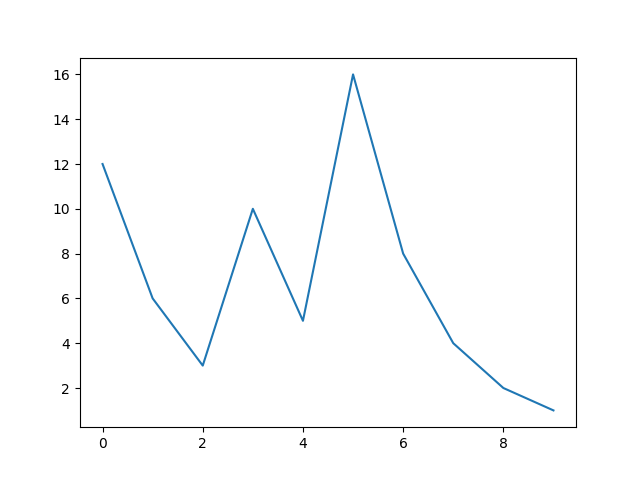

In [16]:
figure()
plot(collatz_history)

That gives a much better picture of what is going on: you can see how the value gradually rises until the sequence hits a number that is a multiple of some high power of 2, when the "halving" step makes it decrease rapidly. You can **try zooming in to the plot using the "rectangle" tool and returning to the original view using the "home" button. When you are finished, press the "power" button in the top right of the figure (next to the title)** to indicate that you no longer wish to change the figure. 

(You don’t actually even need the `figure` function above; the `plot` function will make a new figure if none is open, or plot to the most recent figure if it is still open for input: that is, if you haven’t yet pressed that “power” button. Because this can be confusing if the most recent figure is a long way back in the notebook, I recommend always explicitly creating a new figure with `figure` if you want one.)

You can see that the `plot` function called with just a list as argument plots that list against the sequence number (that is, the first element is plotted at $x = 0$, the second at $x = 1$, and so forth).

The `plot` function can also take a string argument that specifies how to format the plot. Some codes you can use are listed in the table below (full list in the [documentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html)); you can specify the colour, marker style, line style, or any combination of these.

 character | meaning 
--------| ------
`'b'` |	blue
`'g'` |	green
`'r'` |	red
`'k'` |	black
`'.'` |	point marker
`'o'` |	circle marker
`'s'` |	square marker
`'*'` |	star marker
`'+'` |	plus marker
`'x'` |	x marker
`'-'` |	solid line style
`'--'`| 	dashed line style
`'-.'`| 	dash-dot line style
`':'` |	dotted line style

Try using this to plot the Collatz sequence starting from 12, using red circles joined by a dashed line. The syntax you want is `plot(list, format_string)`.

<IPython.core.display.Javascript object>


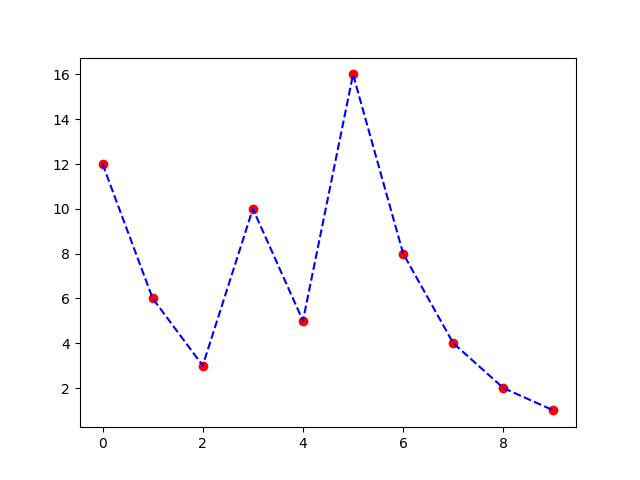

In [18]:
figure()
plot(collatz_history, 'ro')
plot(collatz_history,'b--')

Let's now consider how to plot a mathematical function. By far the easiest way to do this involves a new data type, provided by the `numpy` package, called an `array`. We will actually generate the array using the `linspace()` function, and the function we want to plot (say) is $\cos(x)$, or `cos()`. For convenience, all of these functions are available in the `pylab` module:

In [89]:
from pylab import linspace, pi, cos

# Suppose we want to plot $\cos x$ from $-2\pi$ to $2\pi$. The first step is to generate a set of $x$ values in this range, which is the job of `linspace`. We can get 50 evenly spaced $x$ points by:

In [65]:
x = linspace(-2*pi, 2*pi, 50)

If you evaluate a cell containing simply `x`, you will see that this is an `array`: 

In [66]:
x

array([-6.28318531, -6.02672876, -5.77027222, -5.51381568, -5.25735913,
       -5.00090259, -4.74444605, -4.48798951, -4.23153296, -3.97507642,
       -3.71861988, -3.46216333, -3.20570679, -2.94925025, -2.6927937 ,
       -2.43633716, -2.17988062, -1.92342407, -1.66696753, -1.41051099,
       -1.15405444, -0.8975979 , -0.64114136, -0.38468481, -0.12822827,
        0.12822827,  0.38468481,  0.64114136,  0.8975979 ,  1.15405444,
        1.41051099,  1.66696753,  1.92342407,  2.17988062,  2.43633716,
        2.6927937 ,  2.94925025,  3.20570679,  3.46216333,  3.71861988,
        3.97507642,  4.23153296,  4.48798951,  4.74444605,  5.00090259,
        5.25735913,  5.51381568,  5.77027222,  6.02672876,  6.28318531])

One key feature of this data type is that *we can apply mathematical functions to every element at once.* So to calculate our `y` values, we simply type:

In [68]:
y = cos(x)

Then plotting is as simple as

<IPython.core.display.Javascript object>


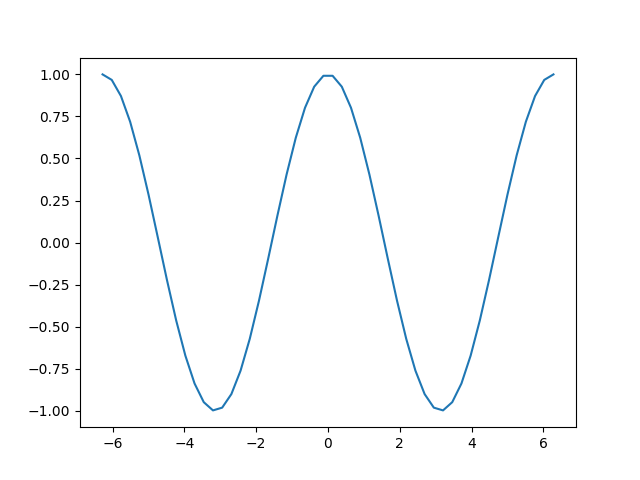

In [69]:
figure()
plot(x,y)

**Using this functionality, plot $y = \tanh(x)$ from –5 to 5. Put gridlines on your graph.** 

*Hint:* you can import almost any mathematical function you can think of, including `tanh()`, from `pylab`, and the `grid()` function from the same module will apply gridlines.

<IPython.core.display.Javascript object>


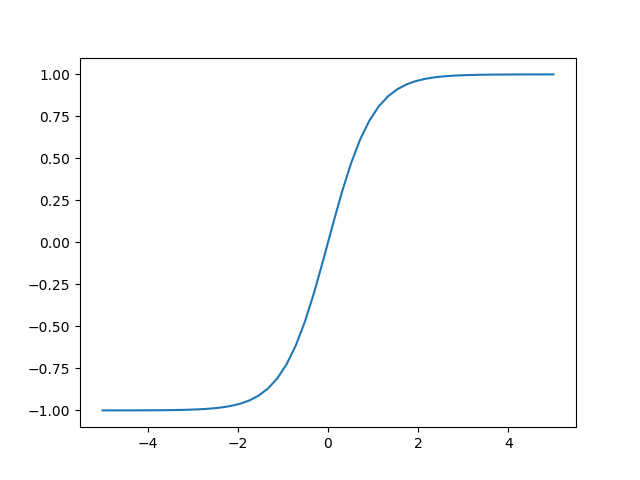

In [71]:
from pylab import tanh
a=linspace(-5,5,50)
b=tanh(a)
figure()
plot(a,b)

The `numpy` package and `array` type are very useful in scientific analysis and we will repeatedly return to them during this module.

▶ **CHECKPOINT 2**

We now return to further features of the Python standard library.

## Data types, continued

### Dicts

A `dict` (dictionary) is a set of *keys*, each of which has a *value*. Syntatically, these are written using curly brackets `{}`. The keys can be used to index the dict in the same way that numbers are used to index lists and tuples. This can be useful if we want to store information associated with, say, a particular name or ID number:

In [72]:
bank_account = {'Anthony': -0.42, 'Basil': 109287.29}
print(bank_account['Anthony'])

-0.42


Note that dicts do *not* have a guaranteed order, and cannot therefore be indexed by number (unless of course we have specifically defined that number as a key):

In [74]:
bank_account[0]

KeyError: 0

If we try to loop through a dict in the same way as for a list, our variable runs through the *keys* of the dict:

In [75]:
day_length = { # planetary day length in hours
"Mercury": 1408, 
"Venus": 5832, 
"Earth": 24, 
"Mars": 25, 
"Jupiter": 10, 
"Saturn": 11, 
"Uranus": 17, 
"Neptune": 16 
}

for planet in day_length:
    print("The day on", planet, "is", day_length[planet], "Earth hours long.")

The day on Mercury is 1408 Earth hours long.
The day on Venus is 5832 Earth hours long.
The day on Earth is 24 Earth hours long.
The day on Mars is 25 Earth hours long.
The day on Jupiter is 10 Earth hours long.
The day on Saturn is 11 Earth hours long.
The day on Uranus is 17 Earth hours long.
The day on Neptune is 16 Earth hours long.


You can add new keys to a dict simply by referring to them as if they already exist:

In [76]:
day_length['Pluto'] = 153 # Maintain the rage!

Comprehensions work in a similar way: for instance, we could create a (rather trivial) dict of even and odd numbers using the following dict comprehension:

In [77]:
even = {i: i % 2 == 0 for i in range(10)} # the % operator gives the remainder after division by an integer
print(even)

{0: True, 1: False, 2: True, 3: False, 4: True, 5: False, 6: True, 7: False, 8: True, 9: False}


**Write a function to create a `dict` whose keys are the characters that occur in a string, and whose values are the number of times those characters occur.**

*Hint*: Using a `for` loop to loop through a string will set the loop variable to each character in turn. That is, if I start a loop by `for ch in "Hello":`, then the first time through the loop `ch` will be `'H'`, the second time `'e'`, and so forth.

*Example input*: `count_characters("The rain in Spain falls mainly on the plain.")` should return

    {' ': 8,
     '.': 1,
     'S': 1,
     'T': 1,
     'a': 5,
     'e': 2,
     'f': 1,
     'h': 2,
     'i': 5,
     'l': 4,
     'm': 1,
     'n': 6,
     'o': 1,
     'p': 2,
     'r': 1,
     's': 1,
     't': 1,
     'y': 1}

In [84]:
def count_characters(string):
    d={}
    for i in string:
        d[i]=string.count(i)
    return d

In [86]:
count_characters("The rain in Spain falls mainly on the plain.")

{' ': 8,
 '.': 1,
 'S': 1,
 'T': 1,
 'a': 5,
 'e': 2,
 'f': 1,
 'h': 2,
 'i': 5,
 'l': 4,
 'm': 1,
 'n': 6,
 'o': 1,
 'p': 2,
 'r': 1,
 's': 1,
 't': 1,
 'y': 1}

### Sets

A `set` can only have one copy of each element, and again doesn't have any order. Sets are also made using curly brackets `{}`, but without any keys:

In [87]:
favourite_letters = {'a', 'b', 'a', 'a', 'c'}
print(favourite_letters)

{'c', 'a', 'b'}


One reason to use them where appropriate is that sets are quicker to search through than lists:

In [88]:
my_list = ['a', 'b', 'a', 'a', 'c']
my_set = set(my_list) # another way of making a set

%timeit 'c' in my_list
%timeit 'c' in my_set

10000000 loops, best of 3: 102 ns per loop
The slowest run took 30.49 times longer than the fastest. This could mean that an intermediate result is being cached.
10000000 loops, best of 3: 43.4 ns per loop


You should find that it takes less time to search for `'c'` in the set than in the list; this time difference becomes more significant when the size of the set grows.

## Format strings

This final section is really a matter of aesthetics – but it's nice to be able to make output look well-laid out and professional!

The `format()` function is a string *method* – a function that applies only to strings. It replaces curly brackets `{}` in the string with the values of its arguments. Consider the following simple example:

In [ ]:
"{} is a moon of {}".format("Io", "Jupiter")

You can include information in the curly brackets to specify exactly how a value should be converted to a string. This information always comes after a colon `:` and ends with a letter specifying the sort of number that should be printed. Common examples include 

Letter | Meaning
------ | -------
   `f` | floating-point number, usual notation
   `e` | floating-point number, scientific notation
   `d` | integer, decimal
   `s` | string

In between, we can specify the number of spaces that should be left to print the number and, where relevant, the number of decimal places that should be used:

In [ ]:
from numpy import pi

print("pi  = {}".format(pi))         # no special format information given
print("pi  = {:10.5f}".format(pi))   # float, 10 spaces, 5 decimal places
print("pi  = {:8.2f}".format(pi))    # float, 8 spaces, 2 decimal places
print("pi  = {:8.2e}".format(pi))    # float, scientific notation, 8 spaces, 2 decimal places
print("pi  > {:8d}".format(3))       # decimal integer, 8 spaces
print("pie = {:8s}".format('apple')) # string, 8 spaces (by default left-aligned)

Put this all together by using an appropriate loop together with the `format` function to **print the following data set**, using the `format` function to ensure that the data lines up attractively.

In [ ]:
element_densities = { # densities in g.cm^-3
    'Li': 0.534,
    'Be': 1.8477,
    'B' : 2.34,
    'C' : 2.267, 
    'Na': 0.968,
    'Mg': 1.738,
    'Al': 2.70
}

▶ **CHECKPOINT 3**

**Extension:** return to your Collatz conjecture code and **find the value of $n \leq 1000$ that reaches the *highest number*** before returning to 1. What is this highest number?